# Sequential acquisition

In [1]:
%load_ext autoreload
%autoreload 2

import torch
import sys
import malt

Using backend: pytorch


In [2]:
data = malt.data.collections.esol()

Processing dgl graphs from scratch...
Processing molecule 1000/1128


Make model

In [3]:
# model = malt.models.supervised_model.GaussianProcessSupervisedModel(
#     representation=malt.models.representation.DGLRepresentation(
#         out_features=128,
#     ),
#     regressor=malt.models.regressor.ExactGaussianProcessRegressor(
#         in_features=128, out_features=2,
#     ),
#     likelihood=malt.models.likelihood.HeteroschedasticGaussianLikelihood(),
# )

In [4]:
merchant = malt.agents.merchant.DatasetMerchant(data)
assayer = malt.agents.assayer.DatasetAssayer(data)

In [5]:
player = malt.agents.player.SequentialRandomPlayer(
    # model=model,
    # policy=malt.policy.ThompsonSampling(),
    # trainer=malt.trainer.get_default_trainer(),
    merchant=merchant,
    assayer=assayer,
)

In [6]:
# data_loader = data.view(batch_size=len(data))
# g, y = next(iter(data_loader))

# distribution = model.condition(g)

In [7]:
catalogue_length = len(player.merchant.catalogue())
torch.manual_seed(player.seed)
best = torch.randint(
    size = (1,),
    high = catalogue_length,
).item()
player.merchant.catalogue()[best]


CCCOCCC

In [9]:
while True:
    if player.step() is None:
        break

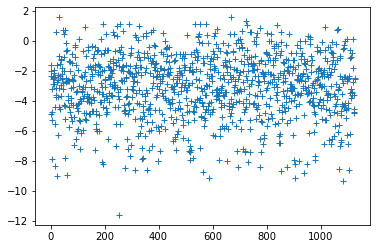

In [10]:
import matplotlib.pyplot as plt
plt.plot(player.portfolio.y, '+')